# DSCI 632 : Final Project

### Team Members:

- Member 1
    - Name: Shyamal Mishra
    - Email: sm4825@drexel.edu

- Member 2
    - Name: Rohit Ragde
    - Email: rar369@drexel.edu


# Dataset Description

For our project we will be using Kaggle's House Prices dataset which can be found here: [kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)


The House Prices dataset provides data collected from residential homes in Ames, Iowa, and is made up of 79 distinct variables that cover nearly every facet of these properties. While people typically equate a house's value with features like its number of rooms or garden size, this dataset shows that a wide variety of both obvious and nuanced factors play a role in determining a home's final sale price. We chose this dataset because of the many feature engineering possibilitites that will hopefully be available with so much data. This dataset also offers an opportunity to implement advanced regression techniques as the target feature we will be predicting is SalePrice. Its complexity makes it a more modern and complex alternative to the more common Boston Housing dataset which we had also considered.

## Analysis Objectives



The analysis of the House Prices dataset encompasses several key objectives. It strives to develop accurate predictive models for estimating residential property sale prices, aiding homeowners, buyers, and real estate professionals in decision-making. Additionally, it aims to identify and quantify the impact of property features on sale prices, empowering homeowners and guiding prospective buyers. Through the examination of historical data, it seeks to reveal market trends, providing insights for real estate investors and policymakers. Furthermore, the analysis explores various regression techniques, from traditional linear regression to advanced algorithms, supporting data scientists in selecting the most effective modeling approaches. Lastly, it delves into feature engineering to optimize model accuracy, benefitting data scientists and analysts.

# EDA

In [ ]:
# CHANGE DIRECTORY TO DATASET
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=7dc61d27839a0457284506a54243544d16c91c2d6015d8a2d0420df158b7add2
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession


In [ ]:
spark = SparkSession.builder \
    .appName("HousePricePrediction") \
    .getOrCreate()


In [ ]:
df = spark.read.csv("/content/gdrive/MyDrive/train.csv", header=True, inferSchema=True)


In [ ]:

df.show(5)


+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Calculate the count of missing values for each column
na_counts = df.select([spark_sum(col(column).isNull().cast('integer')).alias(column) for column in df.columns])

# Display the count of missing values for each column
na_counts.show()


+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

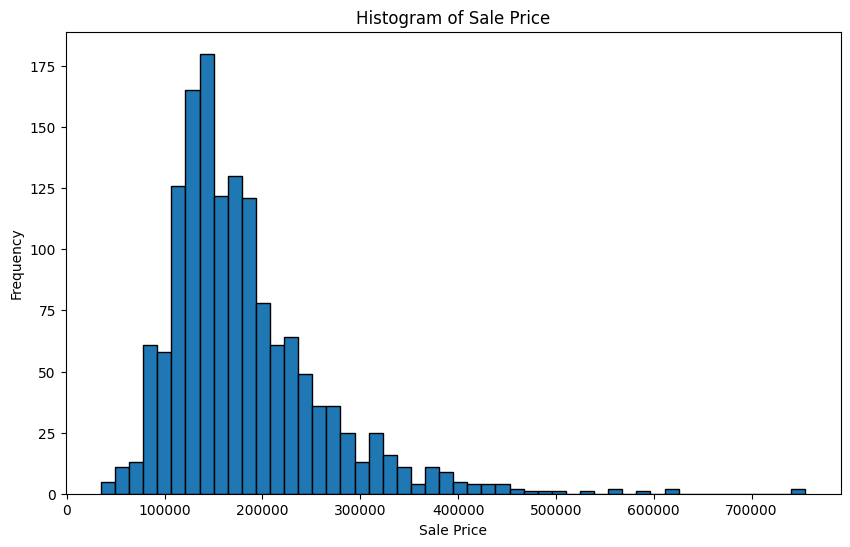

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Checking target variable distribution
# Extract the SalePrice column as a list
sale_prices = df.select('SalePrice').rdd.flatMap(lambda x: x).collect()

# Plot histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(sale_prices, bins=50, edgecolor='black')

# Adding title and labels
plt.title('Histogram of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.show()

# The distribution of the target variable is skewed right. There are likely to be
# high priced outliers.


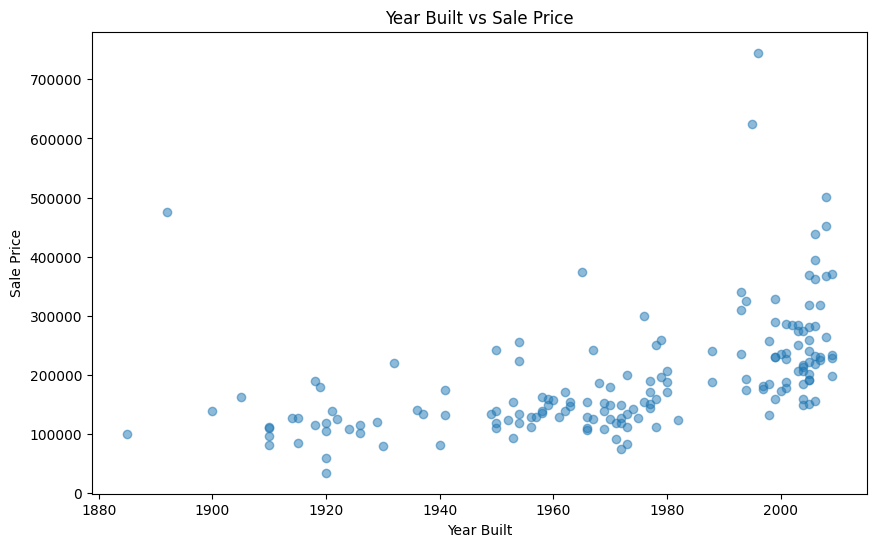

In [ ]:


# Sample a fraction of the data
sample_df = df.select('YearBuilt', 'SalePrice').sample(withReplacement=False, fraction=0.1, seed=42)

# Extract data as lists
year_built = sample_df.select('YearBuilt').rdd.flatMap(lambda x: x).collect()
sale_price = sample_df.select('SalePrice').rdd.flatMap(lambda x: x).collect()

# Plot scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(year_built, sale_price, alpha=0.5)

# Adding title and labels
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

plt.show()

# Here we can see a positive correlation between the year the home was built and the price it ended up selling for.


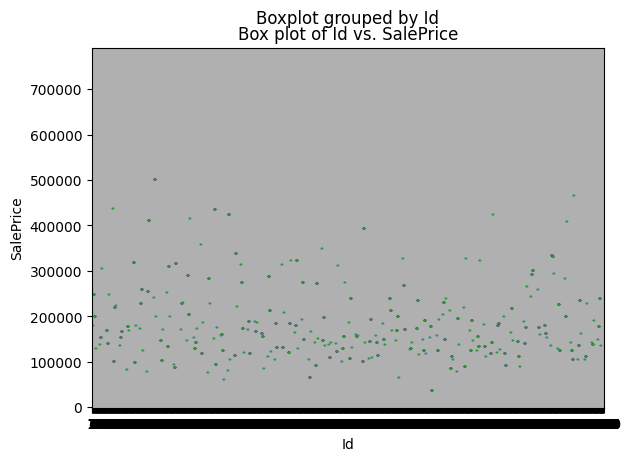

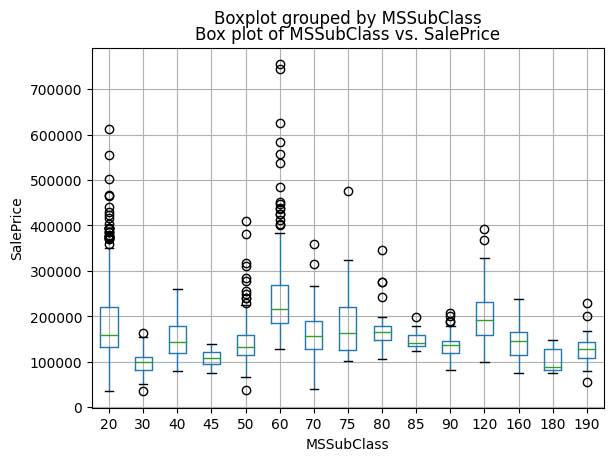

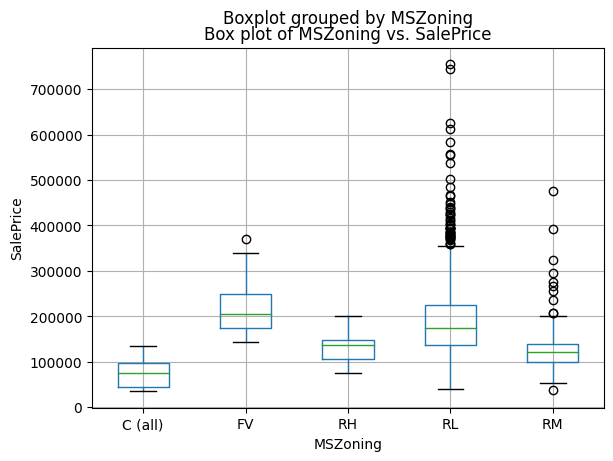

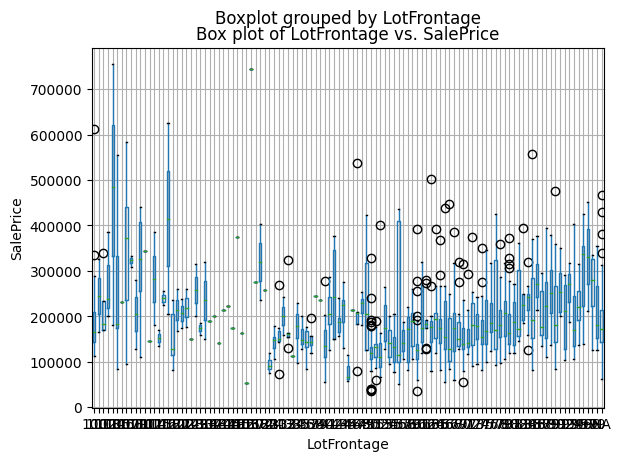

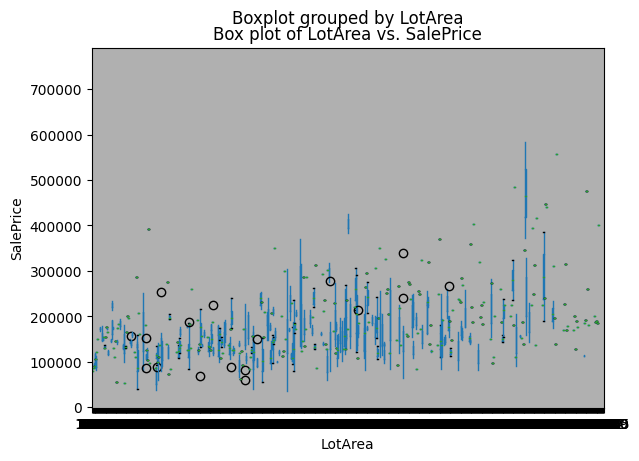

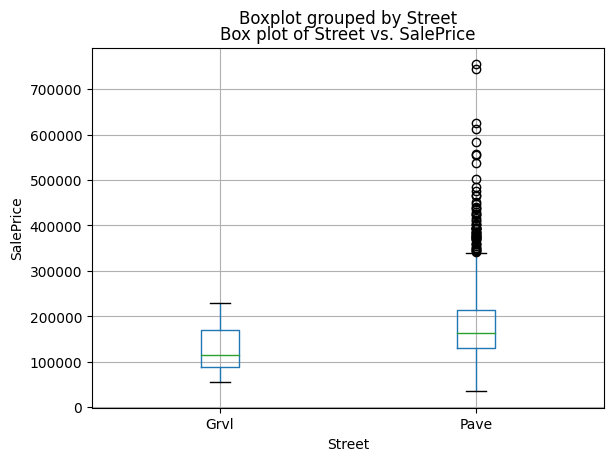

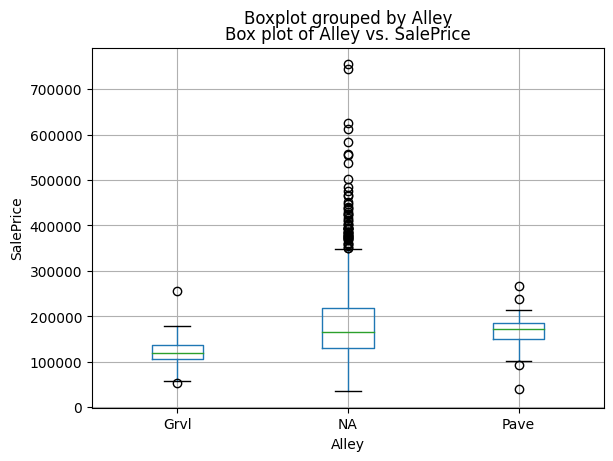

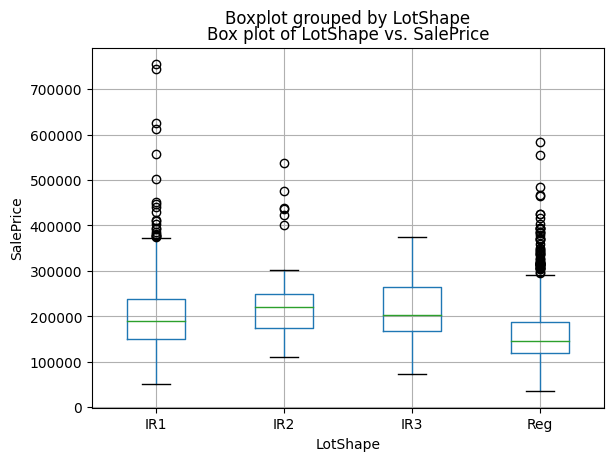

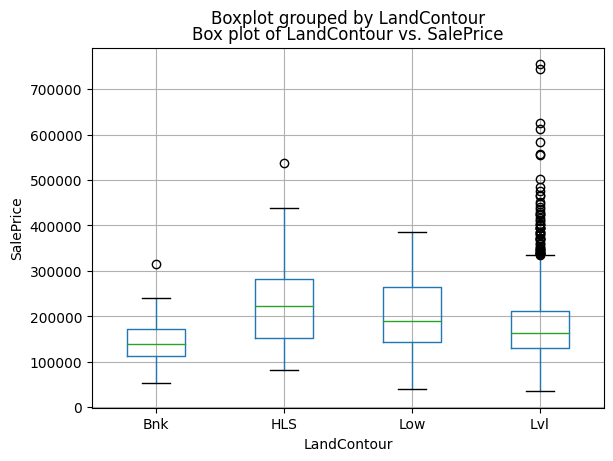

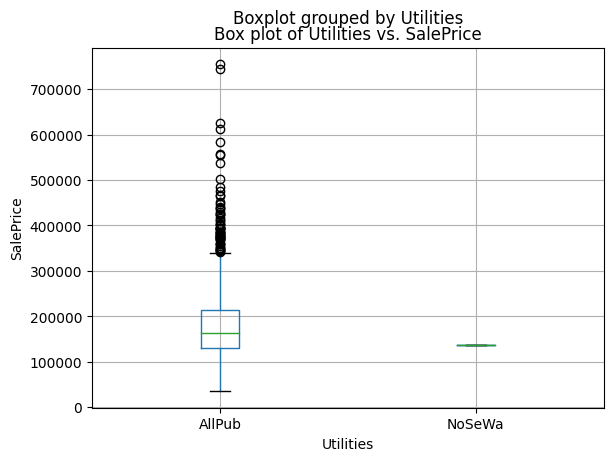

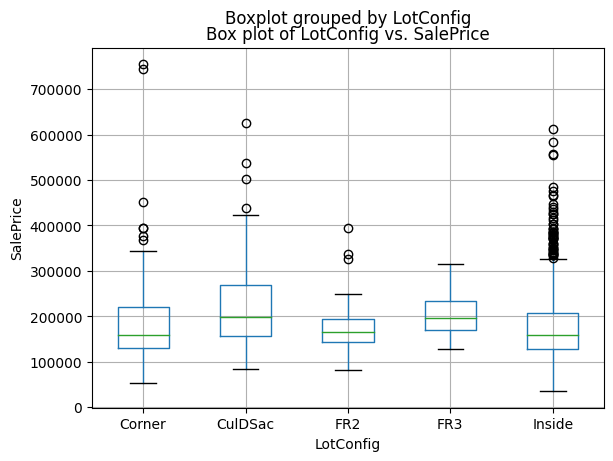

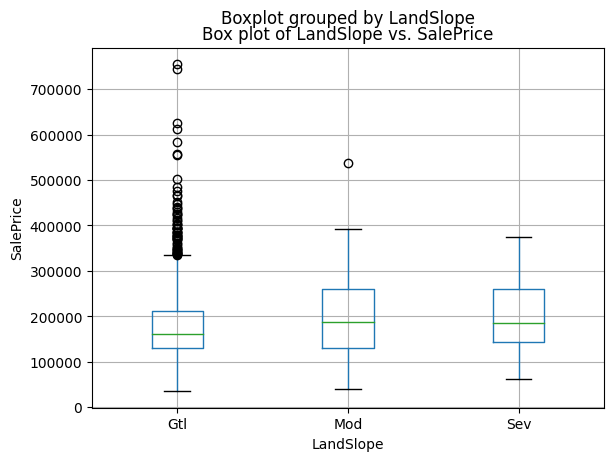

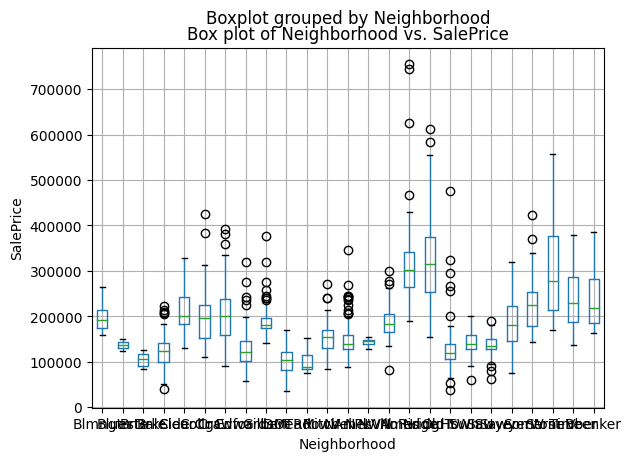

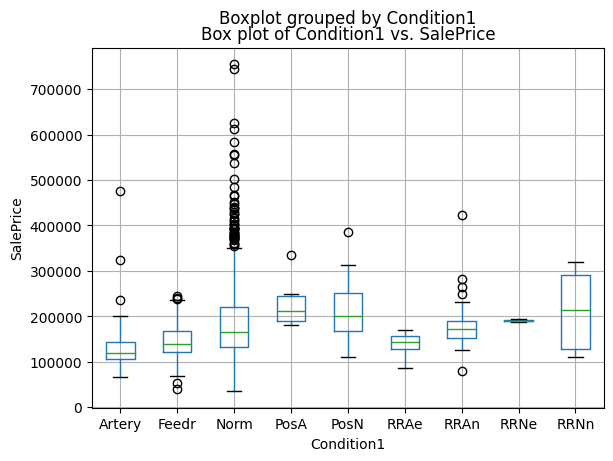

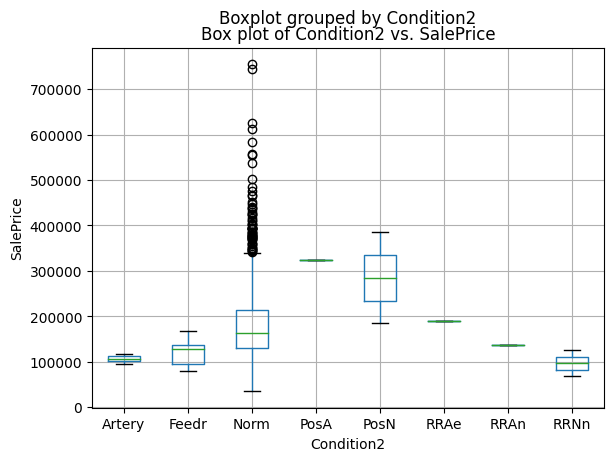

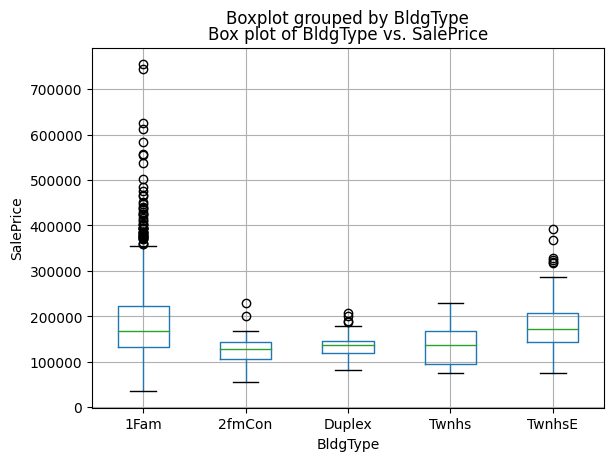

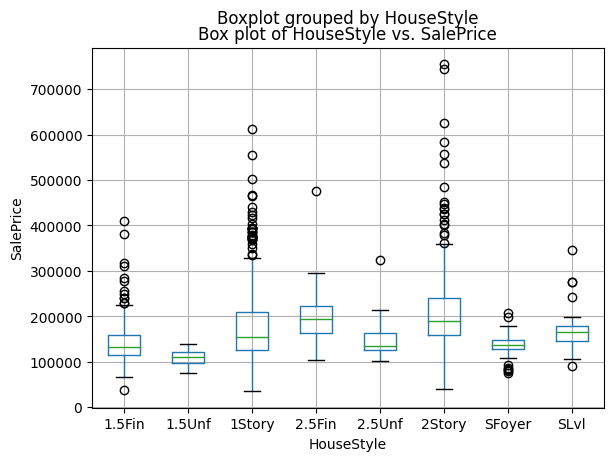

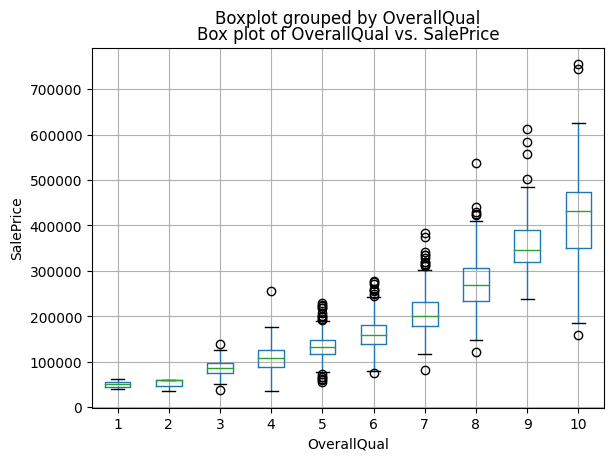

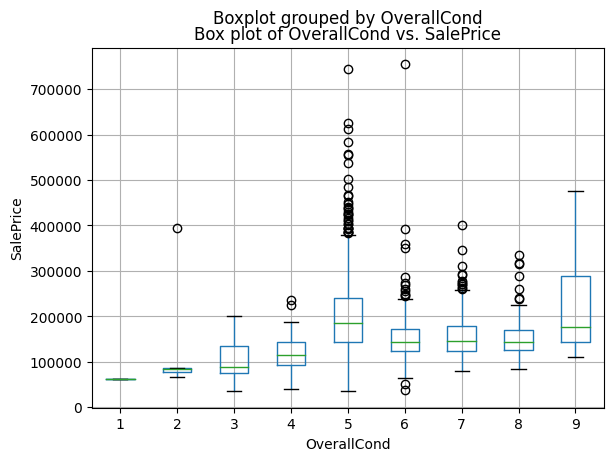

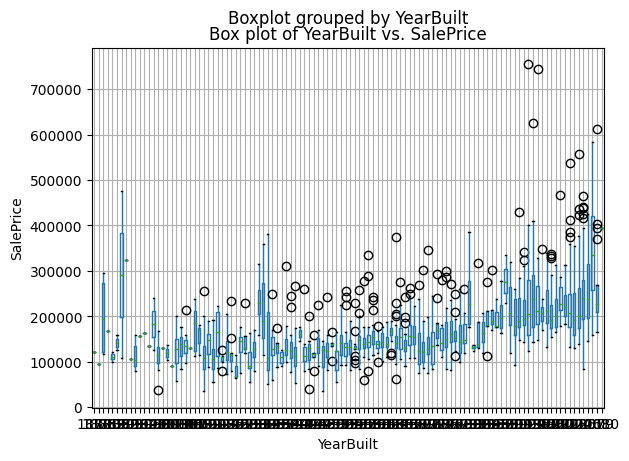

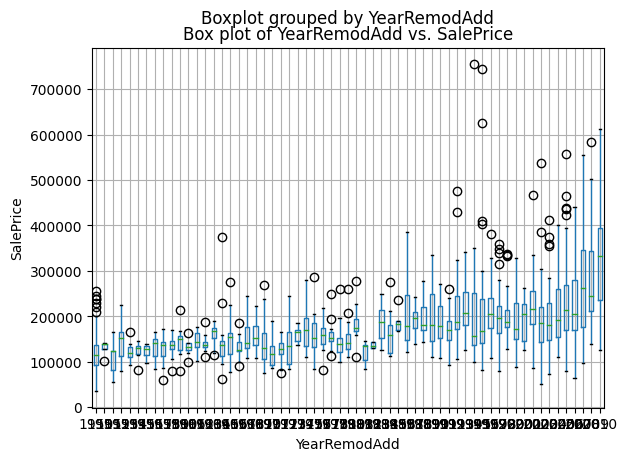

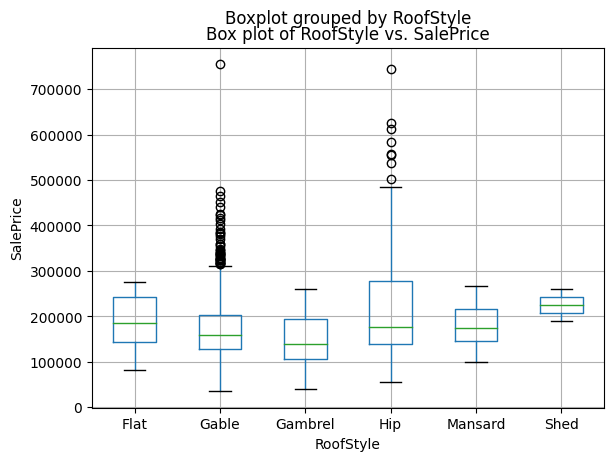

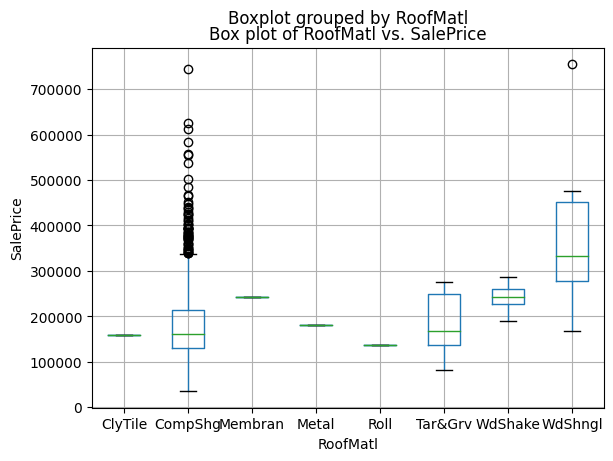

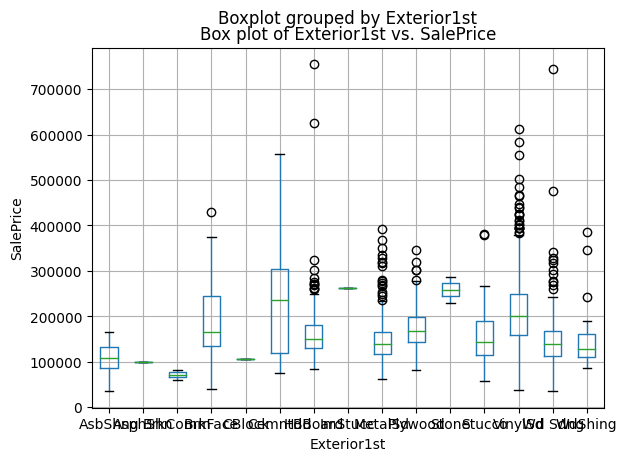

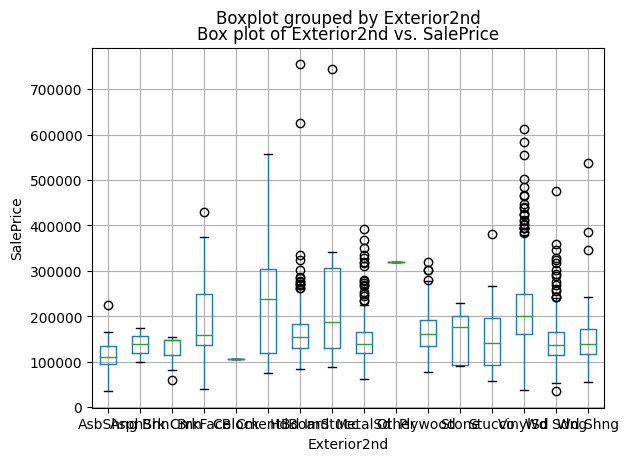

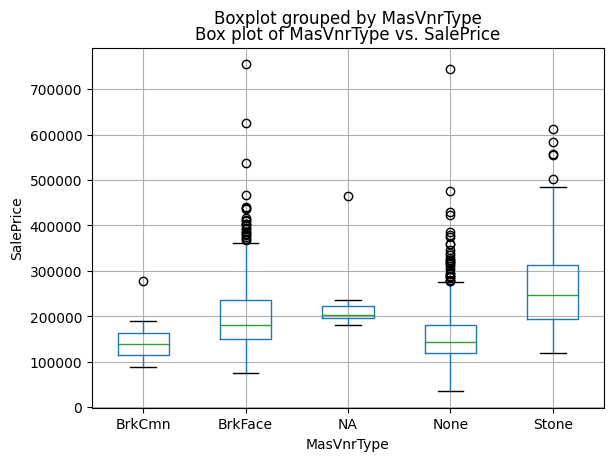

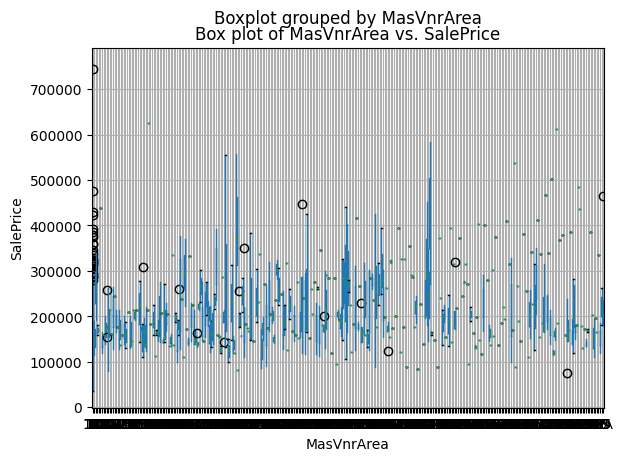

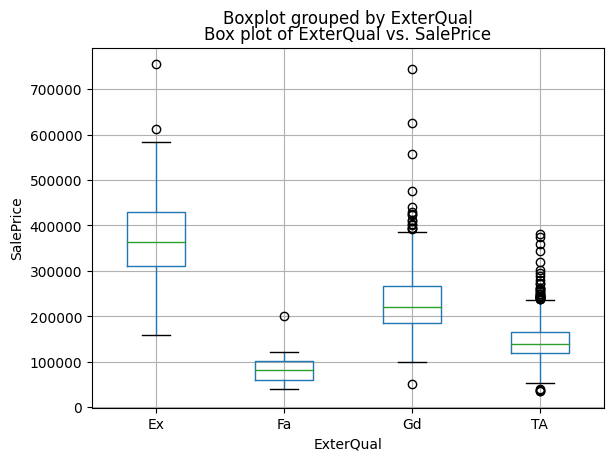

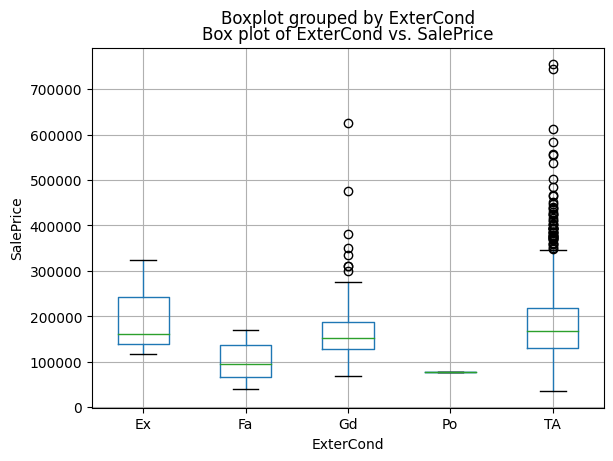

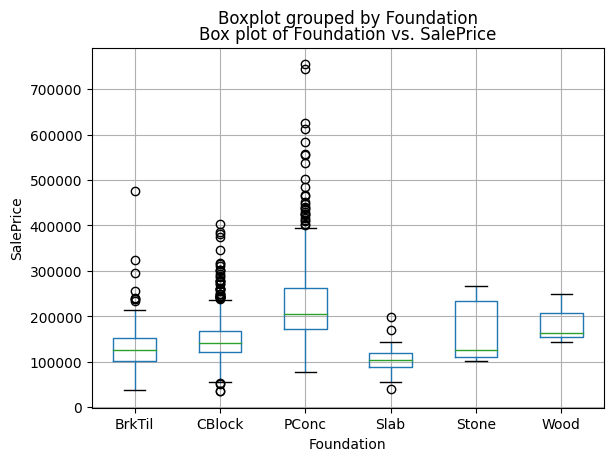

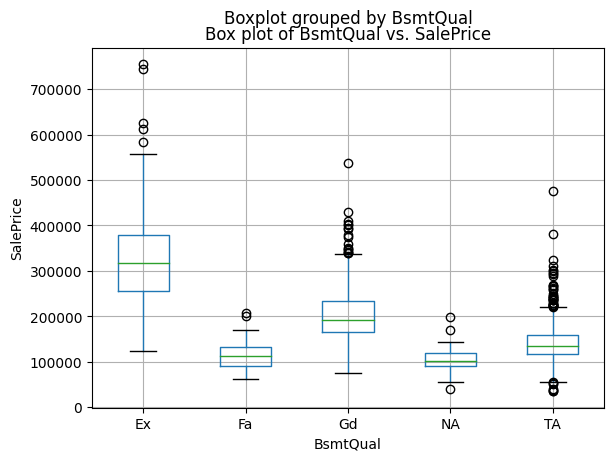

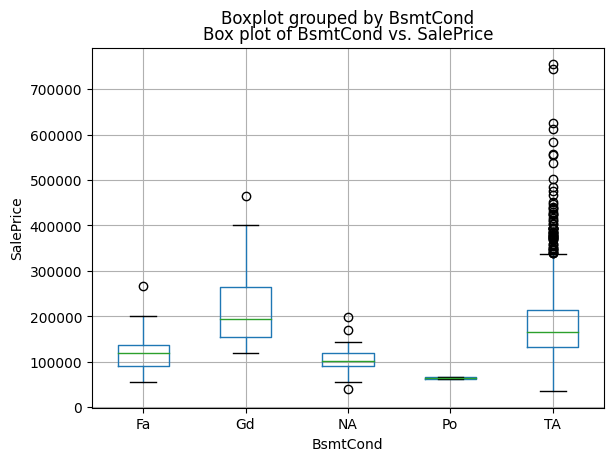

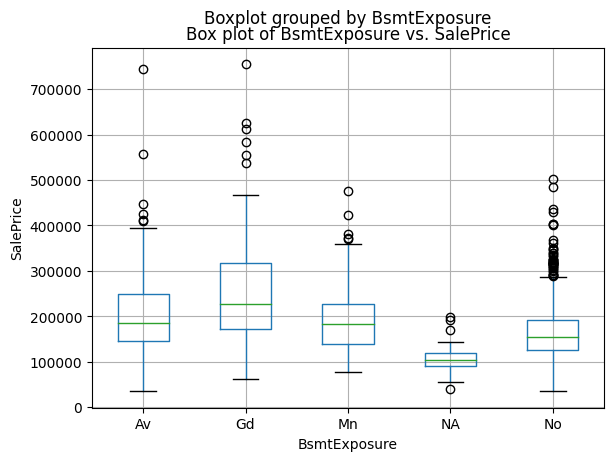

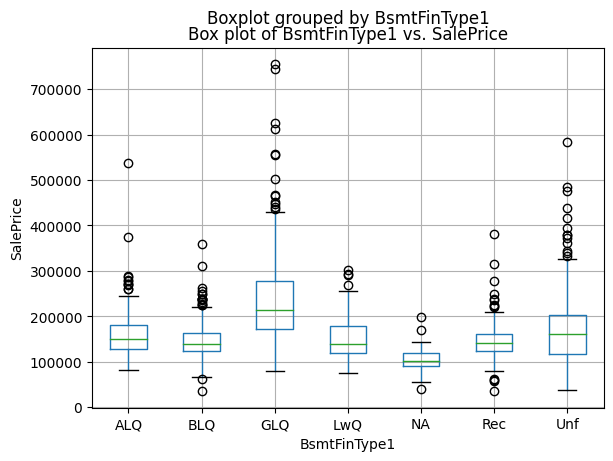

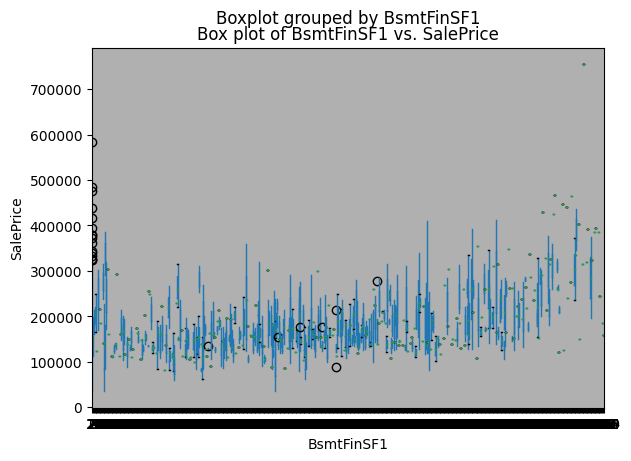

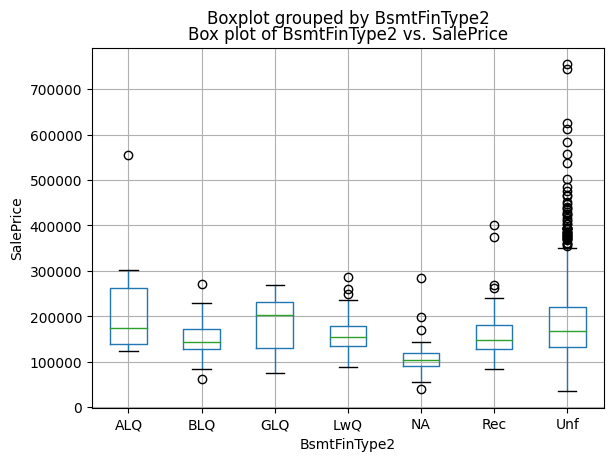

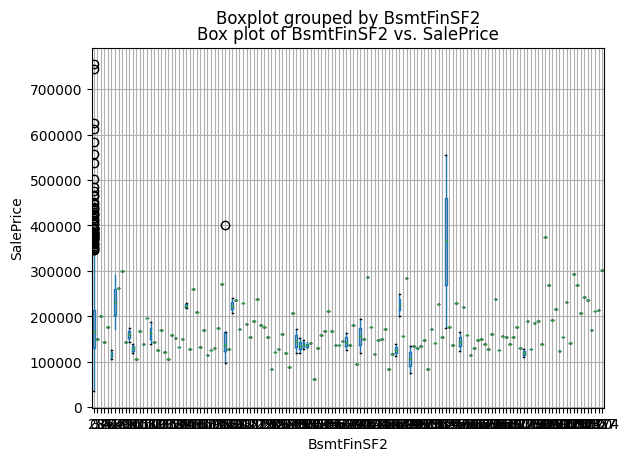

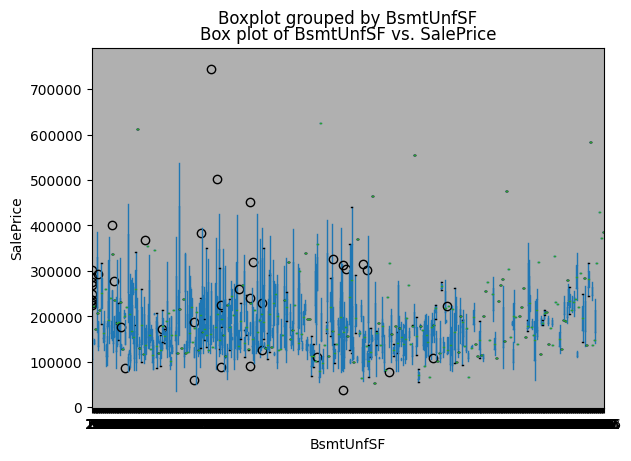

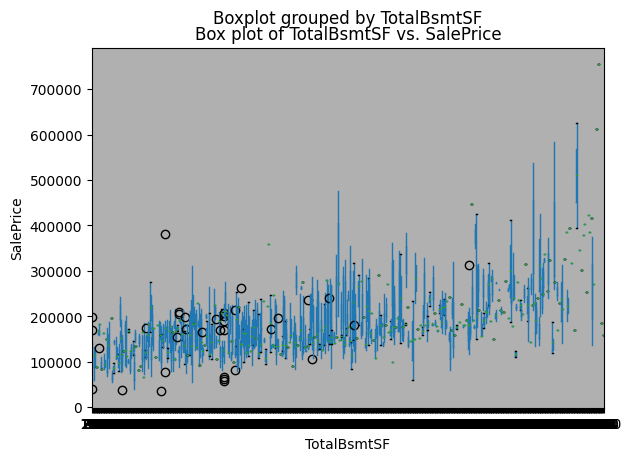

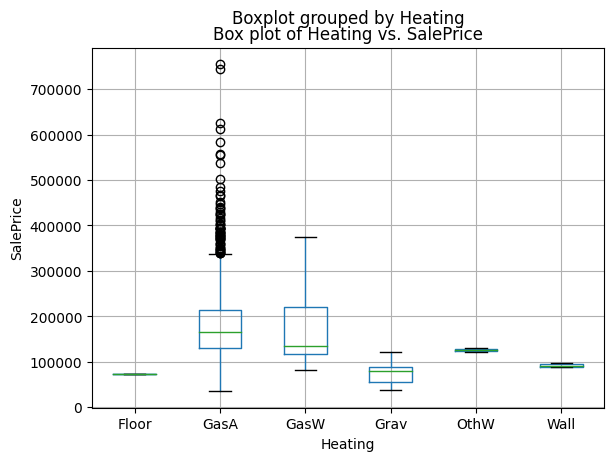

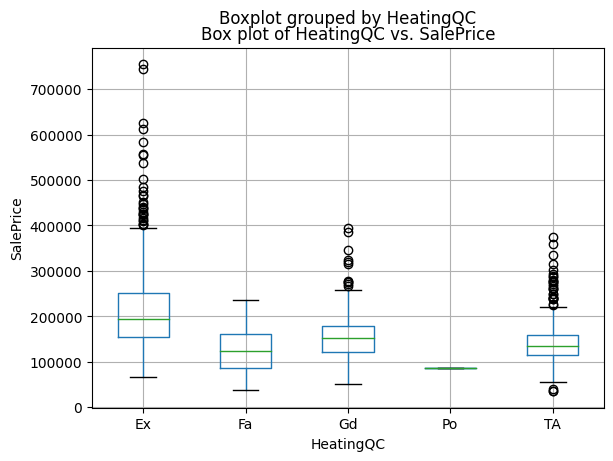

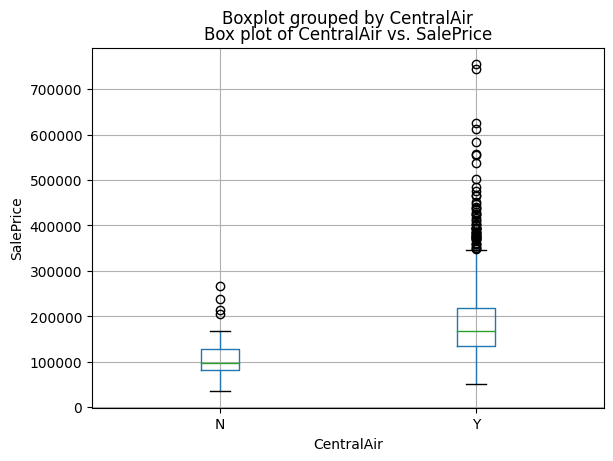

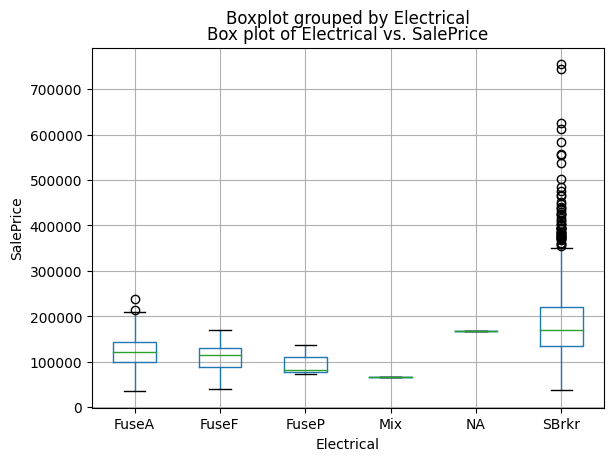

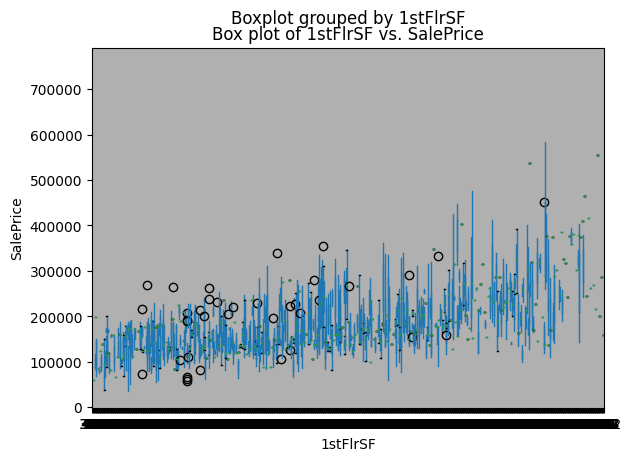

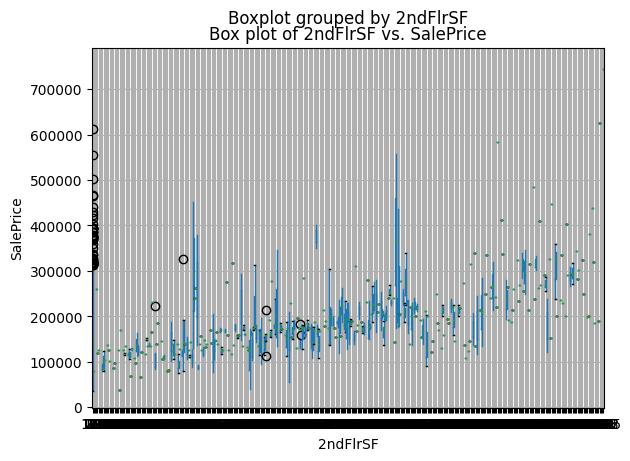

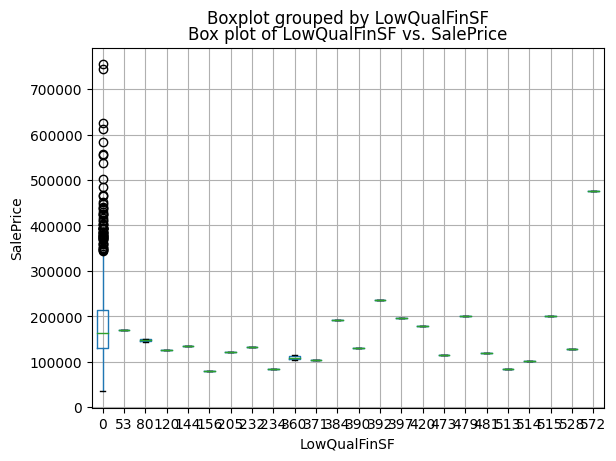

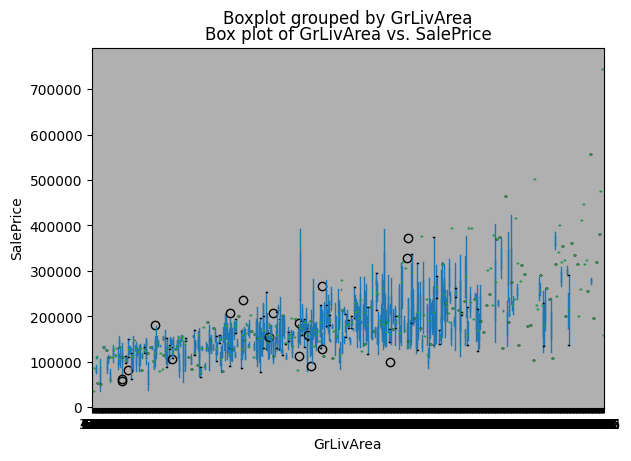

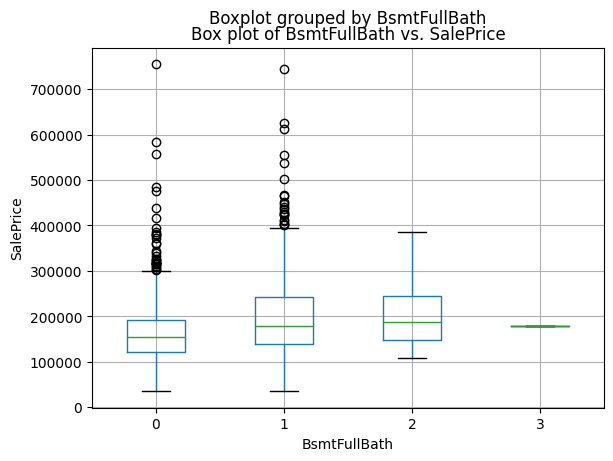

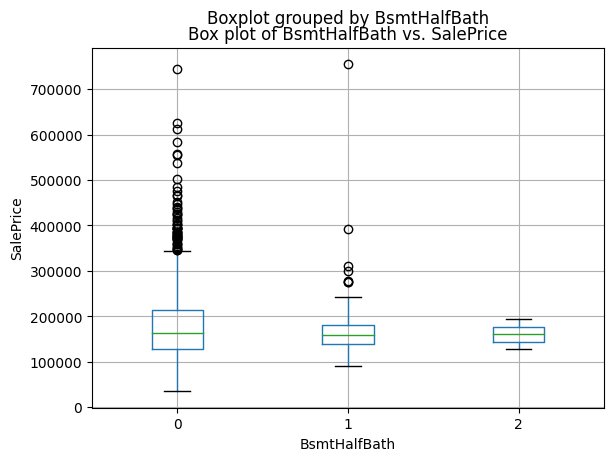

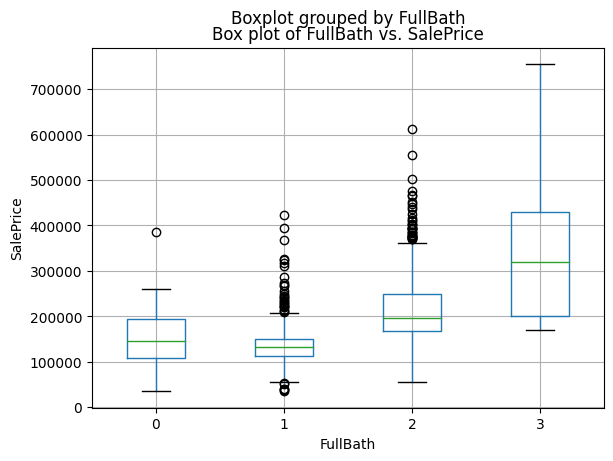

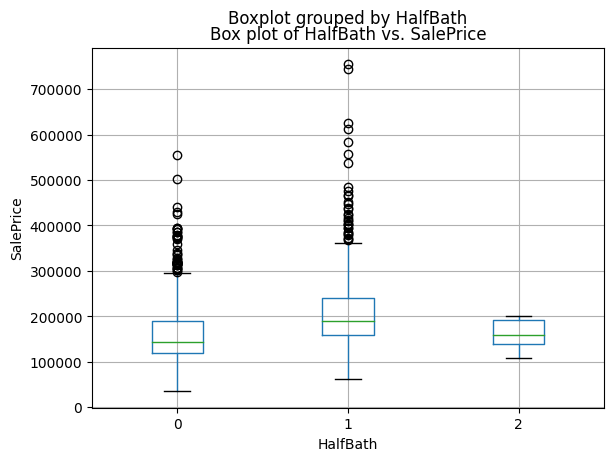

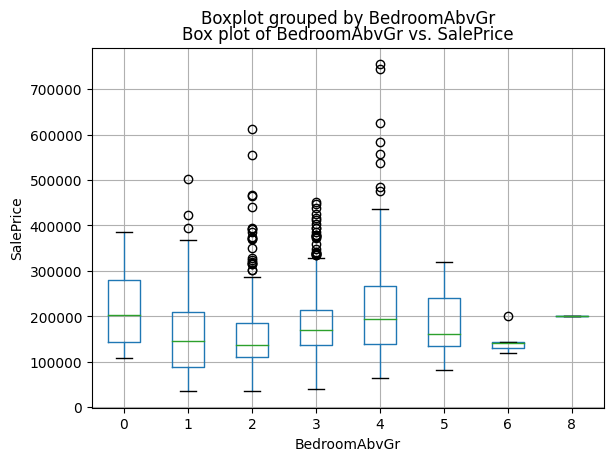

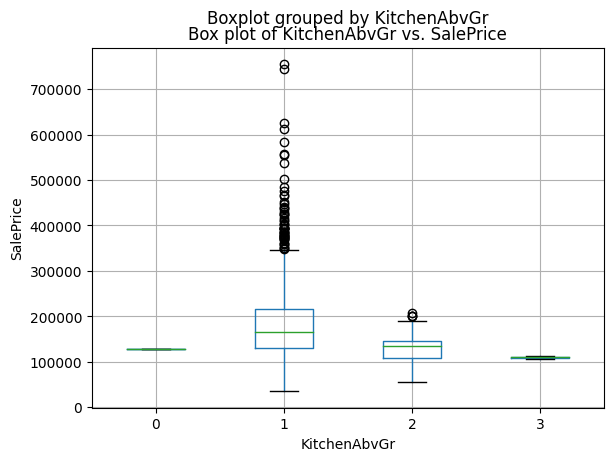

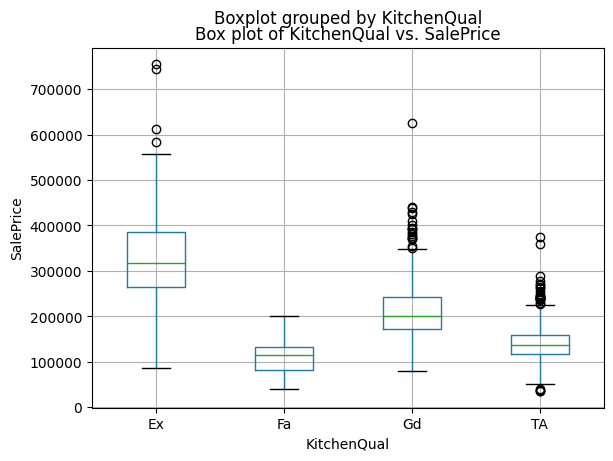

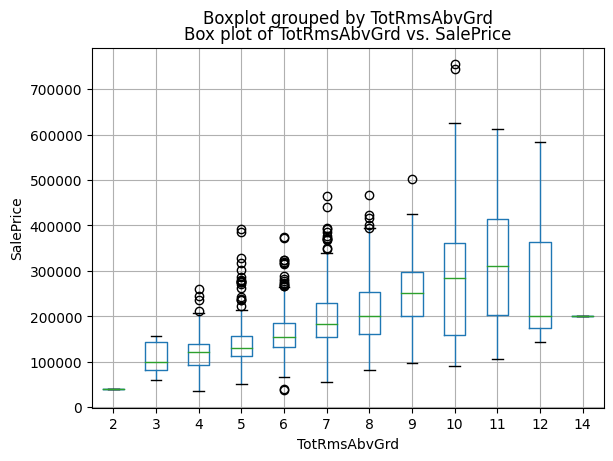

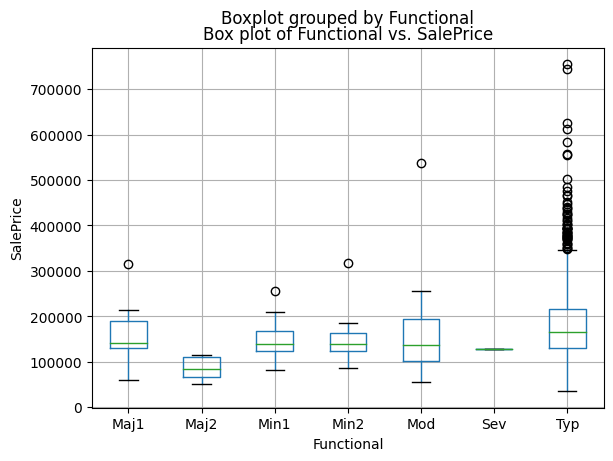

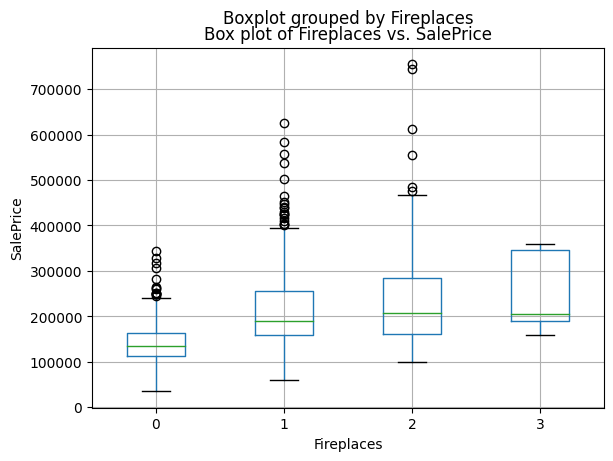

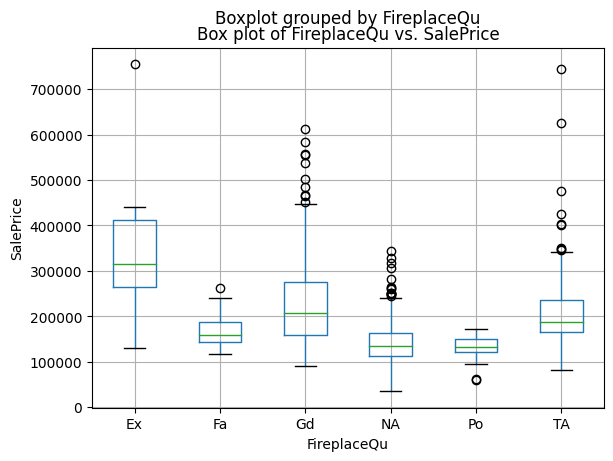

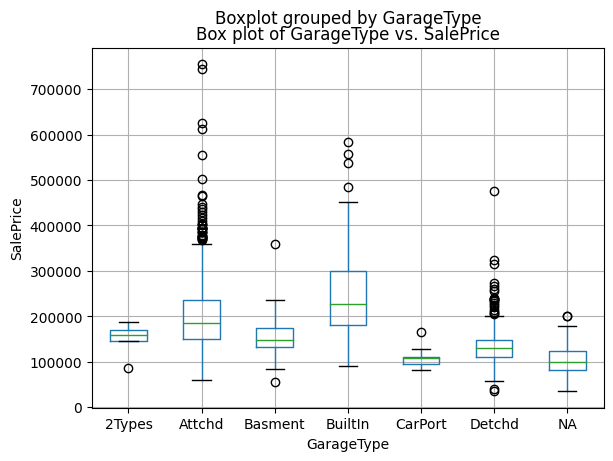

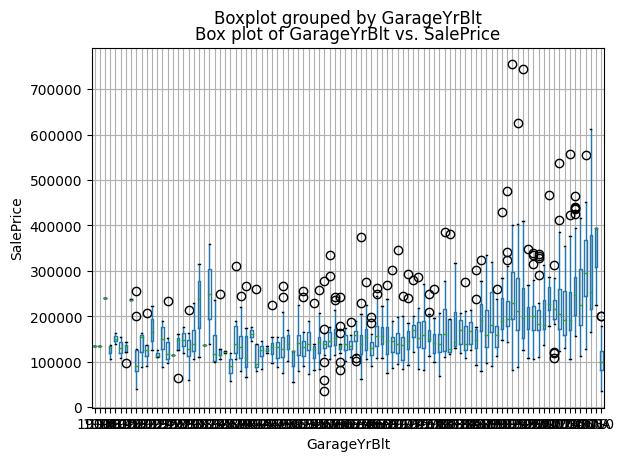

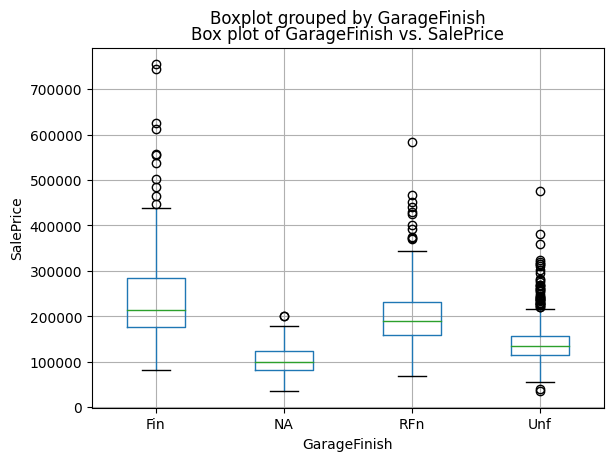

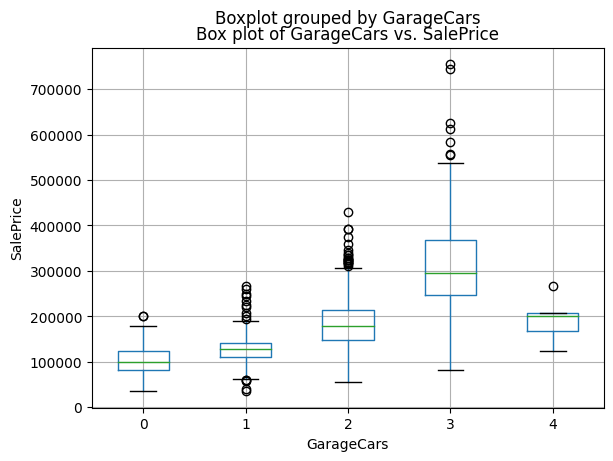

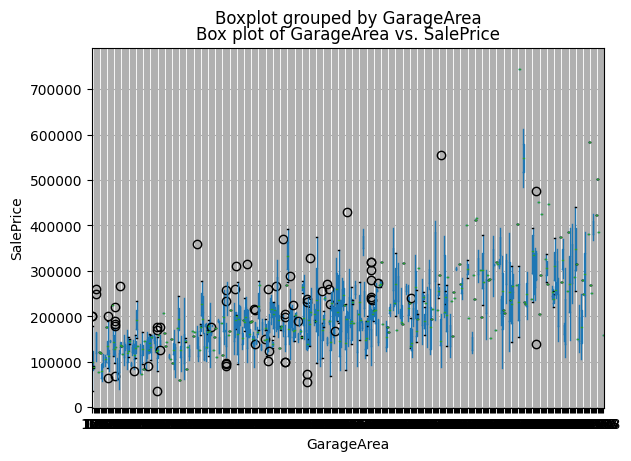

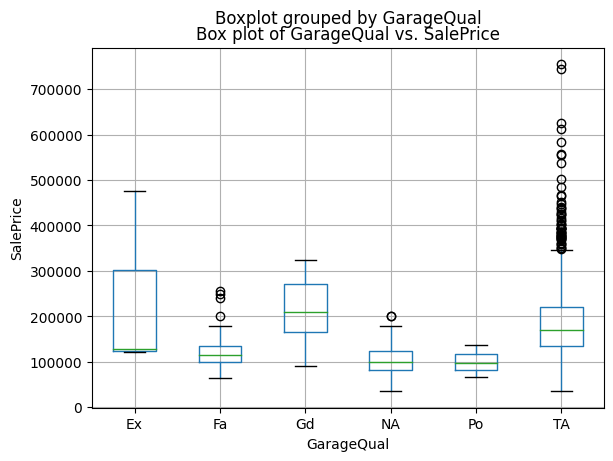

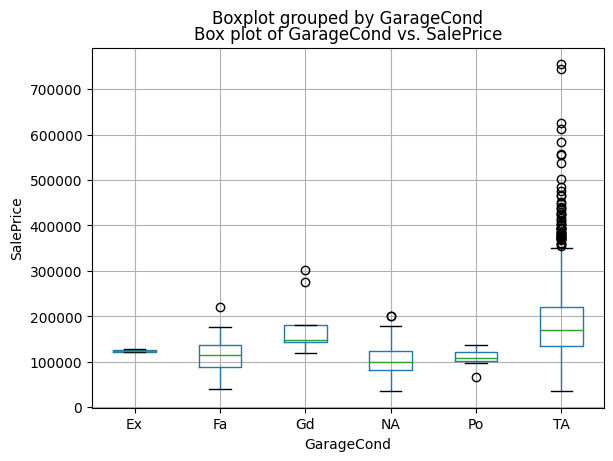

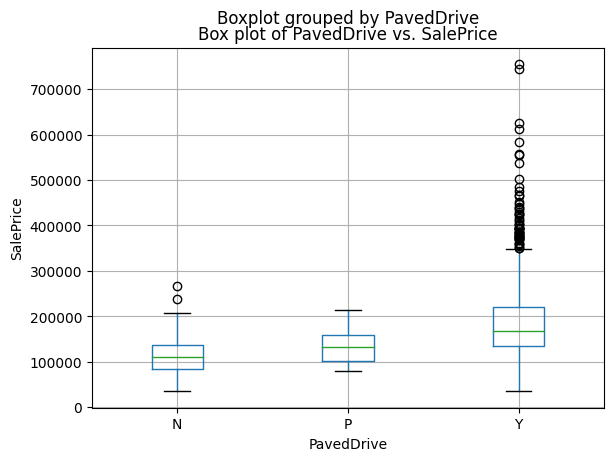

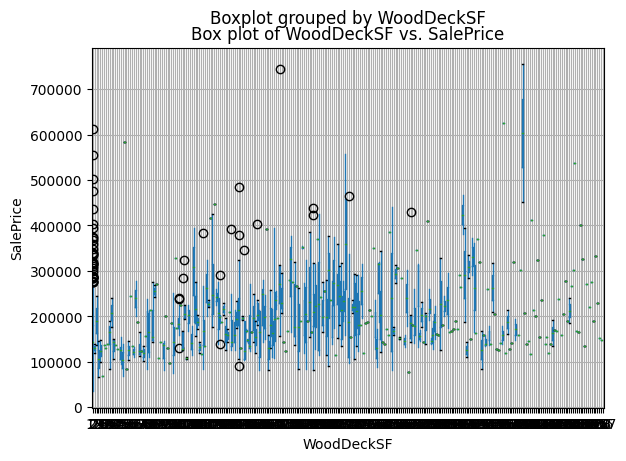

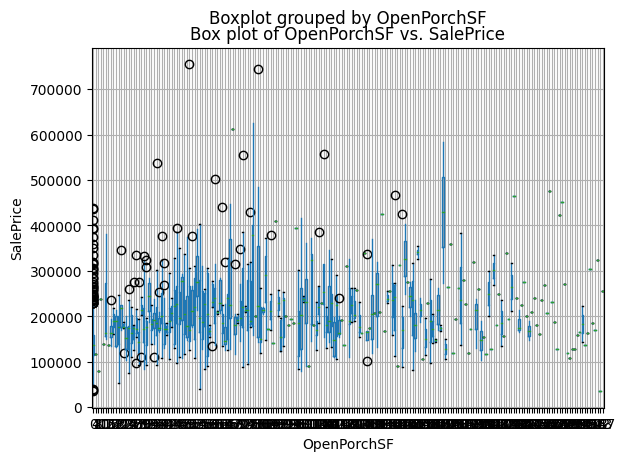

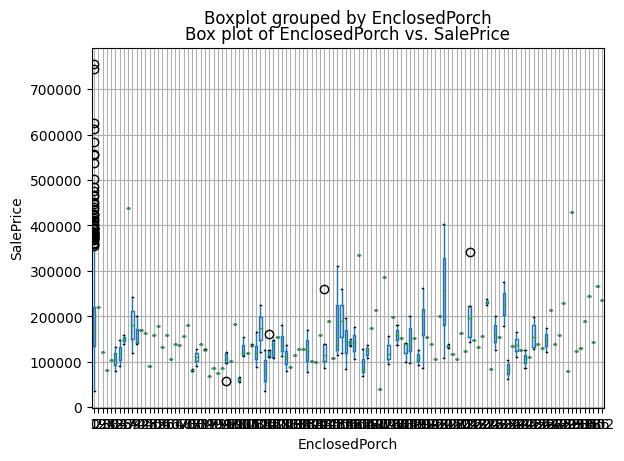

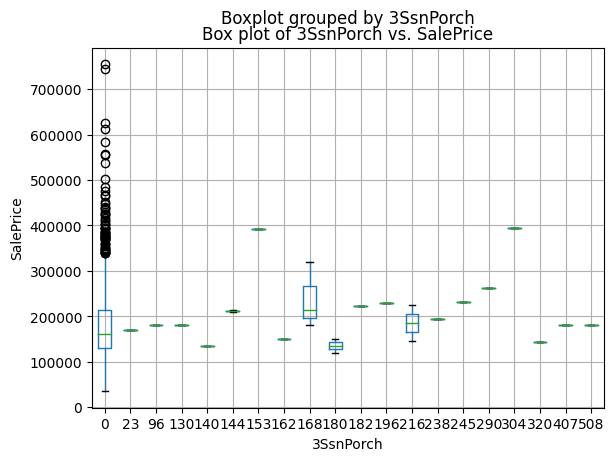

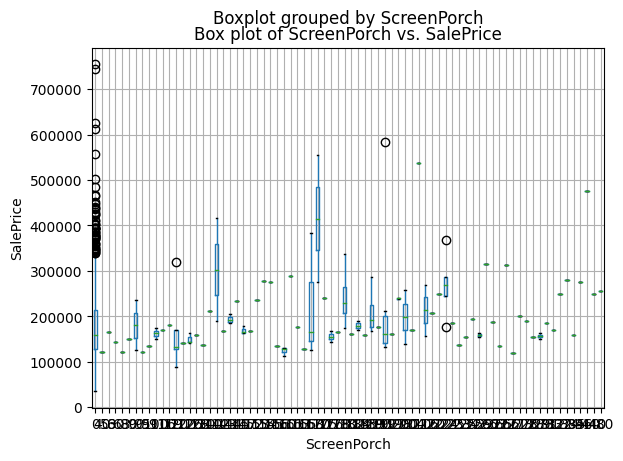

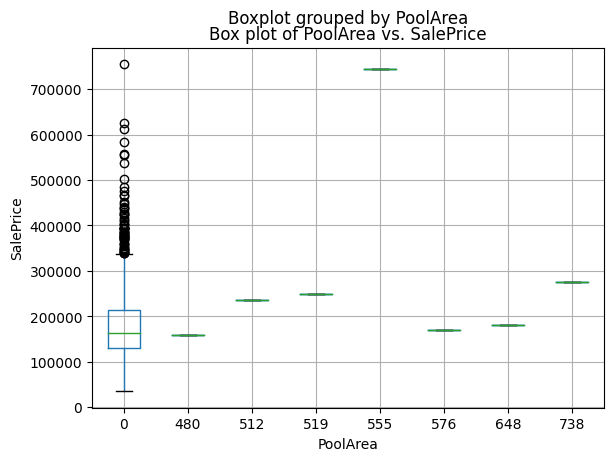

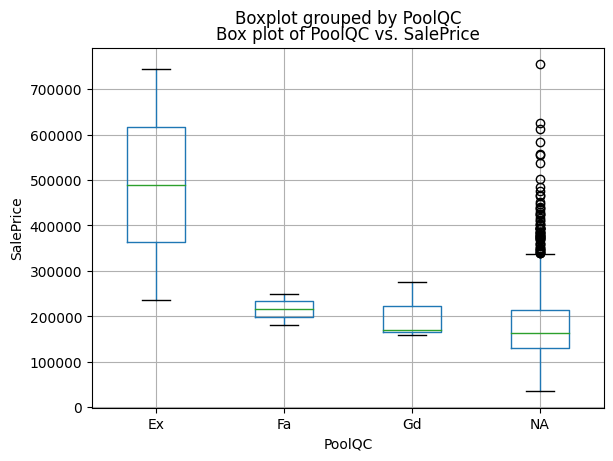

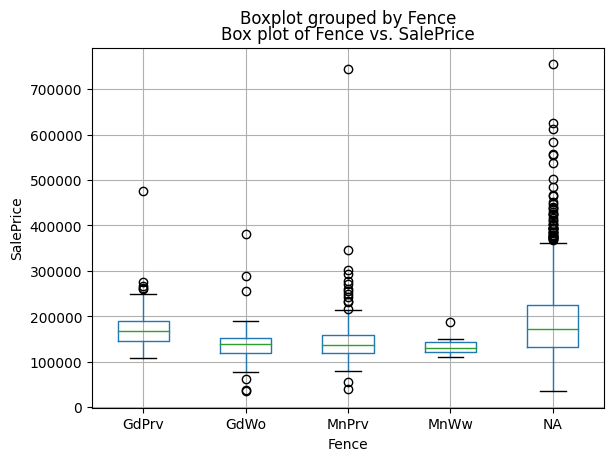

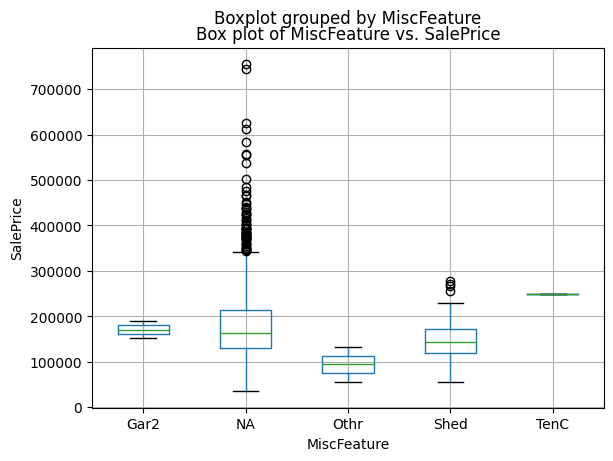

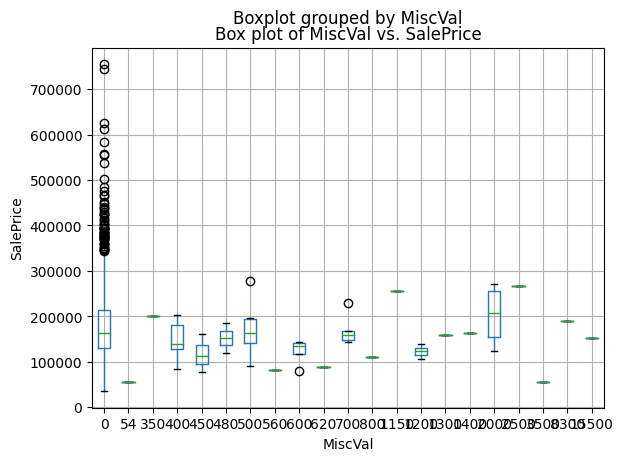

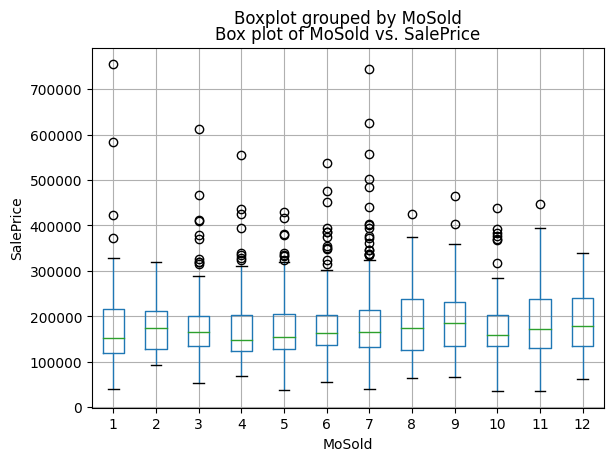

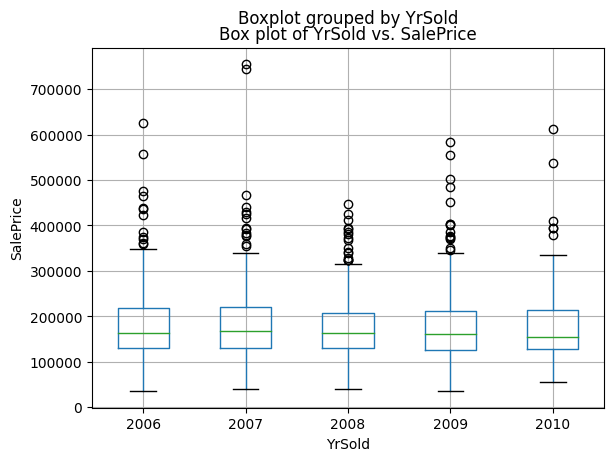

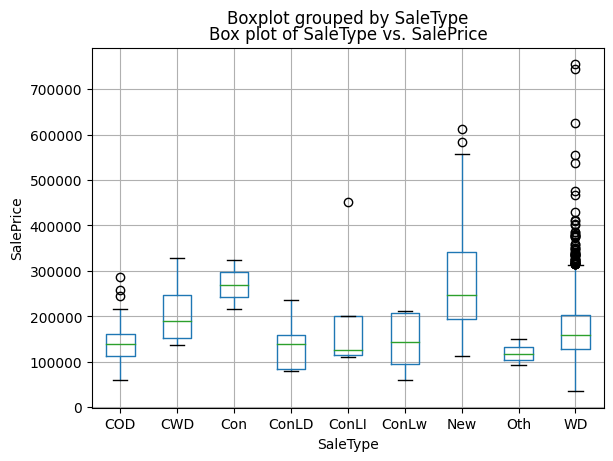

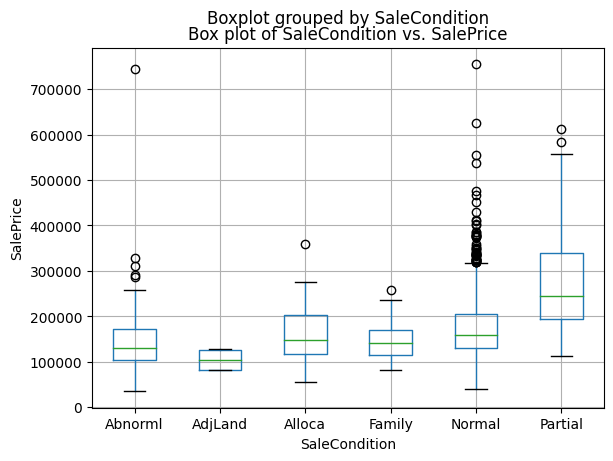

In [ ]:

from pyspark.sql.functions import col

target_variable = 'SalePrice'

# Loop through all columns except the target variable
for column in df.columns:
    if column != target_variable:
        # Scatterplot for numerical variables
        if df.schema[column].dataType in ['IntegerType', 'FloatType']:
            df.select(column, target_variable) \
                .sample(fraction=0.1, withReplacement=False) \
                .toPandas() \
                .plot(kind='scatter', x=column, y=target_variable, alpha=0.5)
            plt.title(f'Scatter plot of {column} vs. {target_variable}')
            plt.xlabel(column)
            plt.ylabel(target_variable)
            plt.show()
        else:
            # Boxplot for categorical variables
            df.select(column, target_variable) \
                .toPandas() \
                .boxplot(by=column)
            plt.title(f'Box plot of {column} vs. {target_variable}')
            plt.xlabel(column)
            plt.ylabel(target_variable)
            plt.show()

# This compares every feature in the dataset against the target sale price.
# Our next step is identifying which features we intend to use.
# Our initial glance showed that many variables show very little or no correlation,
# we will likely drop these to simplify the problem.


In [ ]:

from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.stat import Correlation
from pyspark.ml import Pipeline


# Handle categorical columns (one-hot encoding)
categorical_cols = [col for col, dtype in df.dtypes if dtype == 'string']
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="keep") for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col+"_index", outputCol=col+"_encoded") for col in categorical_cols]
assembler_inputs = [col+"_encoded" for col in categorical_cols] + [col for col in df.columns if col not in categorical_cols]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")
pipeline_stages = indexers + encoders + [assembler]
pipeline = Pipeline(stages=pipeline_stages)
df_vector = pipeline.fit(df).transform(df)

# Compute correlation matrix
correlation_matrix = Correlation.corr(df_vector, "features").head()

# Extract correlation matrix as a PySpark DenseMatrix
corr_matrix = correlation_matrix[0]

# Print correlation matrix
print("Correlation matrix:")
print(corr_matrix)




Correlation matrix:
DenseMatrix([[ 1.        , -0.80858535, -0.41660838, ..., -0.0034293 ,
               0.01271562,  0.2450634 ],
             [-0.80858535,  1.        , -0.0904351 , ..., -0.01719234,
              -0.01713054, -0.28806512],
             [-0.41660838, -0.0904351 ,  1.        , ..., -0.00359363,
               0.00494275,  0.08994972],
             ...,
             [-0.0034293 , -0.01719234, -0.00359363, ...,  1.        ,
              -0.14572141,  0.04643225],
             [ 0.01271562, -0.01713054,  0.00494275, ..., -0.14572141,
               1.        , -0.02892259],
             [ 0.2450634 , -0.28806512,  0.08994972, ...,  0.04643225,
              -0.02892259,  1.        ]])


# Model Implementation

# Linear Regression

In order to find the best model to predict housing prices, we will start by trying a Linear Regression model . Linear Regression is known for its simplicity and interpretability which makes it a good starting point for regression problems like ours. Our dataset, which has key features like OverallQual, GrLivArea, GarageCars, and several others, in order to predict a single value is an ideal scenario to use this model. We aim to explore the relationship between these features and the house prices, hypothesizing from our EDA that factors like the overall quality of the house, living area, and garage capacity are significant predictors of price. Our goal here is to establish a baseline performance that the later, more complex models can be compared against. Our evaluation will not only involve assessing the model's accuracy but also involve a residual analysis to ensure the reliability and robustness of our predictions.

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

# Selecting the wanted columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                    'YearBuilt', 'YearRemodAdd', 'MSZoning', 'SalePrice']
df_selected = df.select(selected_columns)

# One-hot encode categorical variable MSZoning
indexer = StringIndexer(inputCol="MSZoning", outputCol="MSZoningIndex")
indexed_df = indexer.fit(df_selected).transform(df_selected)

# Drop original categorical column and keep the indexed one
df_selected = indexed_df.drop("MSZoning")

# Feature Engineering
# From our EDA, we saw that the above-ground living area was correlated with sale price.
# This new feature is an effort to take more advantage of this feature.
df_selected = df_selected.withColumn("GrLivArea2", col("GrLivArea")**2)

# Define features vector
assembler = VectorAssembler(inputCols=[col for col in df_selected.columns if col != "SalePrice"],
                            outputCol="features")
df_assembled = assembler.transform(df_selected)

# Splitting into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=1)

# Define RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="SalePrice")

# Fit model
model = rf.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Evaluate model
evaluator = RegressionEvaluator(labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 40530.11620908106


In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Selecting the wanted columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                    'YearBuilt', 'YearRemodAdd', 'MSZoning', 'SalePrice']
df_selected = df.select(selected_columns)

# One-hot encode categorical variable MSZoning
indexer = StringIndexer(inputCol="MSZoning", outputCol="MSZoningIndex")
indexed_df = indexer.fit(df_selected).transform(df_selected)

# Drop original categorical column and keep the indexed one
df_selected = indexed_df.drop("MSZoning")

# Feature Engineering
# From our EDA, we saw that the above-ground living area was correlated with sale price.
# This new feature is an effort to take more advantage of this feature.
df_selected = df_selected.withColumn("GrLivArea2", col("GrLivArea")**2)

# Define features vector
assembler = VectorAssembler(inputCols=[col for col in df_selected.columns if col != "SalePrice"],
                            outputCol="features")
df_assembled = assembler.transform(df_selected)

# Splitting into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=1)

# Define the target variable
y_train = train_data.select("SalePrice")
y_test = test_data.select("SalePrice")

# Define features for training and testing
X_train = train_data.select("features")
X_test = test_data.select("features")

# Calculate the total sum of squares on the driver node
total_sales = y_train.selectExpr("mean(SalePrice)").collect()[0][0]
lr_total = y_train.selectExpr(f"sum(pow(SalePrice - {total_sales}, 2))").collect()[0][0]

# Define Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="SalePrice")

# Fit the model on training data
lr_model = lr.fit(train_data)

# Make predictions on test data
lr_predictions = lr_model.transform(test_data)

# Calculate residuals
lr_residuals = lr_predictions.select("SalePrice", "prediction").rdd.map(lambda x: (x[0] - x[1])**2).reduce(lambda x, y: x + y)

# Calculate MSE and R-squared
lr_mse = lr_residuals / lr_predictions.count()
lr_r_squared = 1 - (lr_residuals / lr_total)

print(f"Linear Regression MSE: {lr_mse}, R-squared: {lr_r_squared}")


Linear Regression MSE: 6238145000.839902, R-squared: 0.7698873637773881


Here we see the results of the linear regression model. We will be using the R^2 score to interpret the results of our models. It is a measure of how close the data is to the fitted regression line, basically telling how good of a fit our model is. This model gives an R^2 score of 0.769 which will act as our baseline for future models.

We will now look at a residual plot for this model to see how it performs over different values.

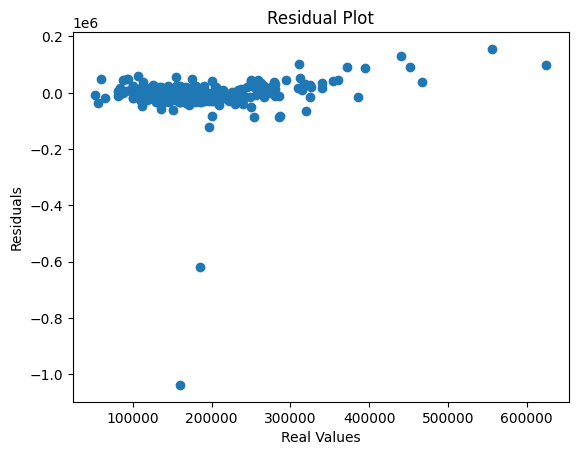

In [ ]:
import matplotlib.pyplot as plt
# Convert PySpark DataFrames to Pandas for easier manipulation
y_test_pd = y_test.toPandas()
lr_predictions_pd = lr_predictions.toPandas()

# Calculate residuals
residuals = y_test_pd['SalePrice'] - lr_predictions_pd['prediction']

# Plotting residuals
plt.scatter(y_test_pd['SalePrice'], residuals)
plt.xlabel('Real Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


This plot shows the difference between predicted and real values. A perfect model would have a line of residuals across a horizontal line at 0, meaning that the predicted is the same as the real value at all areas. However, we can see from this plt that as the actual value increases, the residuals also increase. This suggests that the Linear Regression model may be underestimating the housing prices for higher-valued houses. while the Linear Regression model provides a useful baseline, the residual plot reveals that there are improvements to be made to better capture the nuances of the dataset and improve prediction accuracy, particularly for houses at the higher end of the price spectrum.

# Decision Tree


Now we will move onto the Decision Tree model. Decision Trees offer a more flexible approach to modeling non-linear relationships and interactions between variables without the need for specific feature engineering. They are good at capturing complex patterns in the data by dividing the space into a hierarchy of yes or no decisions, making them goodfor datasets where the relationship between the variables and the target may not be easily approximated by a straight line. Our housing dataset has a diverse range of features from OverallQual to YearRemodAdd, and a Decision Tree has the potential to discern the nuanced decision rules that might factor into the sale price. However, a  consideration with Decision Trees is their tendency to overfit the training data. To prevent this, we will perform hyperparameter tuning, such as the depth of the tree and the minimum number of samples required to split, ensuring that the model generalizes well to unseen data. The following code will initialize our Decision Tree model, tune its hyperparameters, and evaluate its performance.


In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Verify DataFrame schema to ensure the label column exists
df.printSchema()

# Specify the correct label column name based on your DataFrame schema
label_column = 'SalePrice'

# Initialize the Decision Tree model with the correct label column
dt = DecisionTreeRegressor(featuresCol='features', labelCol=label_column, seed=1)

# Define the grid of hyperparameters to search over
param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15, 20, 25, 30]) \
    .addGrid(dt.minInstancesPerNode, [2, 6, 10, 14, 18, 22, 26, 30]) \
    .addGrid(dt.minInfoGain, [0.0]) \
    .build()

# Define an evaluator
evaluator = RegressionEvaluator(metricName='mse', labelCol=label_column)

evaluator_r2 = RegressionEvaluator(metricName='r2', labelCol=label_column)

# Perform Cross Validation with Grid Search
cv = CrossValidator(estimator=dt,
                    estimatorParamMaps=param_grid,
                    evaluator=evaluator,
                    numFolds=5,
                    seed=1)

# Fit the model to the training data
cv_model = cv.fit(train_data)

# Make predictions on the test data
dt_predictions = cv_model.transform(test_data)

# Evaluate the model
dt_mse = evaluator.evaluate(dt_predictions)

# Evaluate the model for R-squared
dt_r2 = evaluator_r2.evaluate(dt_predictions)

# Print the number of fits
print("Fitting", cv.getNumFolds(), "folds for each of", len(param_grid), "candidates, totalling", cv.getNumFolds() * len(param_grid), "fits")

# Print the best parameters
print("Best parameters:", cv_model.bestModel.extractParamMap())

# Print the MSE
print("Decision Tree MSE:", dt_mse)

print("Decision Tree R-squared:", dt_r2)


root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

In [ ]:
# Lets look at the feautre importances from the decision tree:

from pyspark.sql.types import StructType, StructField, StringType, DoubleType

# Define the schema for the DataFrame
schema = StructType([
    StructField("Feature", StringType(), nullable=False),
    StructField("Importance", DoubleType(), nullable=False)
])

# Extract feature importances from the trained model
importance = cv_model.bestModel.featureImportances.toArray()

# Get the feature names from the PySpark DataFrame
spark_features = train_data.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]
features = [feature["name"] for feature in spark_features]

# Create a list of tuples containing feature names and importances
importance_data = [(feature, float(importance)) for feature, importance in zip(features, importance)]

# Create a DataFrame using the schema and the importance data
importance_df = spark.createDataFrame(importance_data, schema=schema)

# Print the DataFrame sorted by importance in descending order
importance_df.orderBy("Importance", ascending=False).show(truncate=False)


+------------+---------------------+
|Feature     |Importance           |
+------------+---------------------+
|OverallQual |0.7215269695124593   |
|GrLivArea   |0.1351784187636792   |
|TotalBsmtSF |0.05425195945286999  |
|YearBuilt   |0.02278019818789738  |
|1stFlrSF    |0.020865956317972566 |
|YearRemodAdd|0.014989086900429341 |
|GarageCars  |0.014649889413521439 |
|GarageArea  |0.010129619509314075 |
|GrLivArea2  |0.003206521645054406 |
|TotRmsAbvGrd|0.002111256299374122 |
|FullBath    |3.1012399742798925E-4|
+------------+---------------------+



These feature importances show that Overall Quality is clearly the best variable for predicting sale price. It also shows that the feature we created has proven to be useful - GrLivArea2. It has 3x higher importance score than the original variable that was not squared.

# Random Forest

To follow up the decision tree model, we will try the Random Forest Regressor, an ensemble learning method known for its versatility. Random Forest builds on the simplicity of decision trees by creating an ensemble of trees with controlled randomness, which is meant to improve the model's generalization. Since there are many different factors influencing housing prices and the potential interactions between them, random forest is able to uncover the underlying patterns within our dataset. By combining the predictions of numerous decision trees, each trained on different subsets of the data, the Random Forest model reduces the risk of overfitting and gets a more comprehensive picture of the data's intricacies. We will tune the hyperparemeters such as the number of trees in the forest and the depth of each tree, which is important for balancing bias and variance and achieving a model that generalizes well to new data.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator





# Selecting the wanted columns
selected_columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                    'YearBuilt', 'YearRemodAdd', 'MSZoning', 'SalePrice']
df_selected = df.select(selected_columns)

# One-hot encode categorical variable MSZoning
indexer = StringIndexer(inputCol="MSZoning", outputCol="MSZoningIndex")
indexed_df = indexer.fit(df_selected).transform(df_selected)

# Drop original categorical column and keep the indexed one
df_selected = indexed_df.drop("MSZoning")

# Feature Engineering
df_selected = df_selected.withColumn("GrLivArea2", df_selected["GrLivArea"]**2)

# Define features vector
assembler = VectorAssembler(inputCols=[col for col in df_selected.columns if col != "SalePrice"],
                            outputCol="features")
df_assembled = assembler.transform(df_selected)

# Splitting into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=1)

# Standardize numerical features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(train_data)
train_data_scaled = scaler_model.transform(train_data)
test_data_scaled = scaler_model.transform(test_data)

# Define RandomForestRegressor
rf = RandomForestRegressor(featuresCol="scaledFeatures", labelCol="SalePrice")

# Define parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Define cross-validator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=param_grid,
                          evaluator=RegressionEvaluator(labelCol="SalePrice", predictionCol="prediction", metricName="rmse"),
                          numFolds=5)

# Fit model
cv_model = crossval.fit(train_data_scaled)

# Make predictions
predictions = cv_model.transform(test_data_scaled)

# Evaluate model
evaluator_rmse = RegressionEvaluator(labelCol="SalePrice", predictionCol="prediction", metricName="rmse")
evaluator_r2 = RegressionEvaluator(labelCol="SalePrice", predictionCol="prediction", metricName="r2")
rmse = evaluator_rmse.evaluate(predictions)
r2 = evaluator_r2.evaluate(predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")




Root Mean Squared Error (RMSE): 38707.43179219108
R-squared: 0.7598180871351901


### Summary
Residual plots for each model revealed that the models perform worse when trying to predict the price of more expensive homes. This could partially be explained by the difference between between the predicted and actual price being a far larger value, but still a similar percentage off than those of lower values.

Comparing all models, it was observed that the Random Forest model performed the best in terms of MSE and R². This comparative analysis highlighted the strengths and weaknesses of each model, with Random Forest and Neural Networks capturing complex patterns effectively, and linear regression struggling with the non-linear nature of the data.

In summary, our exploration through different modeling techniques has provided valuable insights into predicting housing prices. The varying performances and characteristics of each model underscore the complexity of the task and the importance of choosing the right model for the specific nuances of the dataset.

## Potential Improvements

Advanced Feature Engineering: Continuously explore feature engineering possibilities, considering more sophisticated techniques like dimensionality reduction and text analytics for property descriptions.


Time-Series Analysis: Incorporate time-series analysis to capture evolving market trends and adapt to changing dynamics.

Advanced Modeling: Experiment with state-of-the-art machine learning and deep learning models to capture complex feature interactions.


Cross-Validation: Implement robust cross-validation strategies to ensure model stability and reliability.

Feature Importance Analysis: Conduct in-depth feature importance analysis to unveil hidden relationships and patterns.


## Refining Data Selection for Ongoing Analysis with Rationale

Some important data useful for analysis:

**OverallQual**: The overall quality of the house is a critical factor in determining its sale price.  

**GrLivArea**: The above-ground living area's square footage has a substantial impact on property values.  

**GarageCars**: The number of cars the garage can accommodate is a practical feature that influences price.  

**TotalBsmtSF**: The total square feet of the basement is a significant contributor to property value.  

**YearBuilt**: The year the house was built is a fundamental factor in property pricing, reflecting its age and potentially its condition.  